In [2]:
# Analysing movie rating file with 100,000: Counting all the number of 1 star, 2 star, 3 star, 4 star and 5 star.
#Then display this count with bar chart and pie chart

In [16]:
from pyspark import SparkContext, SparkConf

In [3]:
import collections



In [4]:
getConf = SparkConf().setMaster('local').setAppName('Histogram_of_Ratings')

In [5]:
spark = SparkContext(conf= getConf)

In [6]:
getLInes = spark.textFile("mu.data")

In [7]:
getRating = getLInes.map(lambda x : x.split()[2])

In [8]:
getResult = getRating.countByValue()

In [9]:
getSorted = collections.OrderedDict(sorted(getResult.items()))

In [11]:
getSorted

OrderedDict([(u'1', 6110),
             (u'2', 11370),
             (u'3', 27145),
             (u'4', 34174),
             (u'5', 21201)])

In [18]:
valueList = list()

In [19]:
#use print to display
for getKey, getValue in getSorted.iteritems():
    print("%s %i" % (getKey, getValue))
    valueList.append(getValue)

1 6110
2 11370
3 27145
4 34174
5 21201


In [15]:
#Next will like to display in barcharts and piechart

In [20]:
import matplotlib.pyplot as plt
import numpy as np

In [43]:
#BARCHART

In [21]:
valueList

[6110, 11370, 27145, 34174, 21201]

In [22]:
y_pos = np.arange(len(valueList))

array([0, 1, 2, 3, 4])

In [41]:
plt.bar([1,2,3,4,5],valueList, 0.5, color="blue")

<Container object of 5 artists>

In [33]:
plt.xticks([1,2,3,4,5],valueList)

([<matplotlib.axis.XTick at 0x7fc1704de990>,
 <a list of 5 Text xticklabel objects>)

In [28]:
plt.ylabel('Rating')

Text(0,0.5,u'Rating')

In [29]:
plt.title('Movie rating analysis')

Text(0.5,1,u'Movie rating analysis')

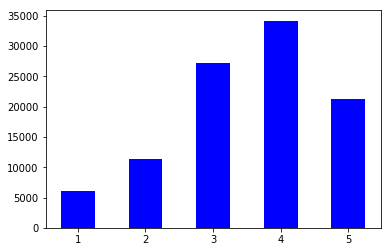

In [42]:
plt.show()

In [44]:
#pie chart

In [45]:
colors = ['gold', 'yellowgreen','blue','lightcoral','red']

In [51]:
explode = (0.1,0,0,0,0)

In [47]:
labels = ['star 1', 'star 2', 'star 3','star 4','star 5']

In [52]:
plt.pie(valueList, explode=explode, labels=labels, colors=colors, autopct = '%1.1f%%',
       shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x7fc170183a90>,
 [Text(-1.04952,0.581808,u'star 1'),
  Text(-1.09898,-0.0472525,u'star 2'),
  Text(-0.343769,-1.0449,u'star 3'),
  Text(1.09922,0.0415207,u'star 4'),
  Text(-0.225664,1.0766,u'star 5')],
 [Text(-0.612222,0.339388,u'6.1%'),
  Text(-0.599446,-0.0257741,u'11.4%'),
  Text(-0.18751,-0.569947,u'27.1%'),
  Text(0.599572,0.0226477,u'34.2%'),
  Text(-0.123089,0.587238,u'21.2%')])

In [53]:
plt.axis('equal')

(-1.1407240634532338,
 1.1083105792830417,
 -1.1112835817930546,
 1.1264070186591892)

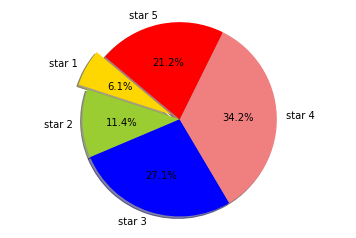

In [54]:
plt.show()